In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [2]:
df = pl.read_csv("./AmazonFoodReviewDataset/Reviews.csv")
df = df.head(10000)
df.shape

(10000, 10)

In [69]:
df.head()

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
i64,str,str,str,i64,i64,i64,i64,str,str
1,"""B001E4KFG0""","""A3SGXH7AUHU8GW""","""delmartian""",1,1,5,1303862400,"""Good Quality Dog Food""","""I have bought several of the V…"
2,"""B00813GRG4""","""A1D87F6ZCVE5NK""","""dll pa""",0,0,1,1346976000,"""Not as Advertised""","""Product arrived labeled as Jum…"
3,"""B000LQOCH0""","""ABXLMWJIXXAIN""","""Natalia Corres ""Natalia Corres…",1,1,4,1219017600,"""""Delight"" says it all""","""This is a confection that has …"
4,"""B000UA0QIQ""","""A395BORC6FGVXV""","""Karl""",3,3,2,1307923200,"""Cough Medicine""","""If you are looking for the sec…"
5,"""B006K2ZZ7K""","""A1UQRSCLF8GW1T""","""Michael D. Bigham ""M. Wassir""""",0,0,5,1350777600,"""Great taffy""","""Great taffy at a great price. …"


### Exploratory Data Analysis

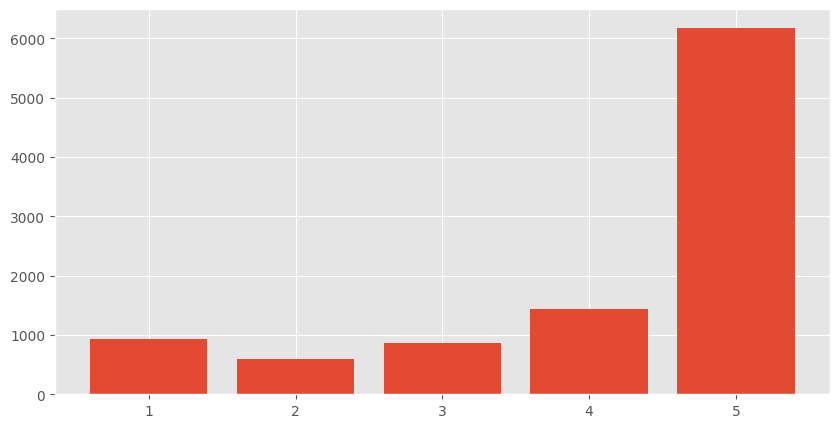

In [3]:
score_count = df['Score'].value_counts().sort(by='Score')
plt.figure(figsize=(10,5))
plt.bar(score_count['Score'], score_count['count'])
plt.show()

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Basic NLTK

In [5]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged_tokens)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


### Using VADER for Sentiment analysis
##### We will use NLTK's methods to get the neg/neu or pos score of words

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [15]:
sia = SentimentIntensityAnalyzer()
sia

In [24]:
sia.polarity_scores("I am happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [25]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [26]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [61]:
dict = {"neg": [0.5]}
dict.update({"neg": [0.6]})
dict

{'neg': [0.6]}

In [102]:
#Run the polarity score on all the texts of dataset
res = {
    "neg": [],
    "neu": [],
    "pos": [],
    "compound": []
}
for text in tqdm(df['Text']):
    score_dict = sia.polarity_scores(text)
    res['neg'].append(score_dict['neg'])
    res['neu'].append(score_dict['neu'])
    res['pos'].append(score_dict['pos'])
    res['compound'].append(score_dict['compound'])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [80]:
#Convert to dataframe for easier manipuplation

vader = (
    pl.from_dict(res)
    .with_row_index("Id", offset=1)
    .select(pl.col('Id').cast(pl.Int64), pl.all().exclude("Id"))
    .join(df, on='Id', how='left')
)
vader.head(4)

Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
i64,f64,f64,f64,f64,str,str,str,i64,i64,i64,i64,str,str
1,0.0,0.695,0.305,0.9441,"""B001E4KFG0""","""A3SGXH7AUHU8GW""","""delmartian""",1,1,5,1303862400,"""Good Quality Dog Food""","""I have bought several of the V…"
2,0.138,0.862,0.0,-0.5664,"""B00813GRG4""","""A1D87F6ZCVE5NK""","""dll pa""",0,0,1,1346976000,"""Not as Advertised""","""Product arrived labeled as Jum…"
3,0.091,0.754,0.155,0.8265,"""B000LQOCH0""","""ABXLMWJIXXAIN""","""Natalia Corres ""Natalia Corres…",1,1,4,1219017600,"""""Delight"" says it all""","""This is a confection that has …"
4,0.0,1.0,0.0,0.0,"""B000UA0QIQ""","""A395BORC6FGVXV""","""Karl""",3,3,2,1307923200,"""Cough Medicine""","""If you are looking for the sec…"


#### Plotting vader sentiment analysis data

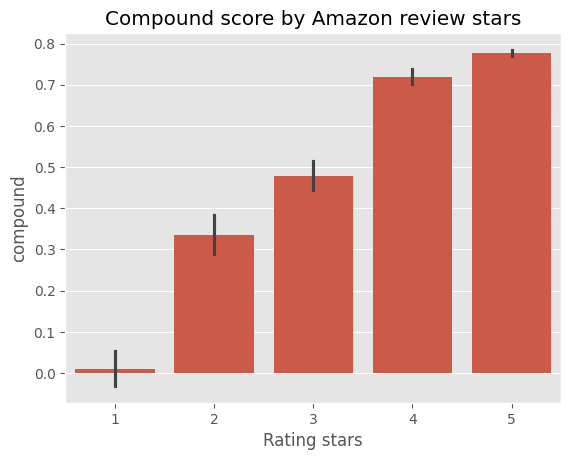

In [87]:
sns.barplot(data=vader, x='Score', y='compound')
plt.title("Compound score by Amazon review stars")
plt.xlabel("Rating stars")
plt.show()

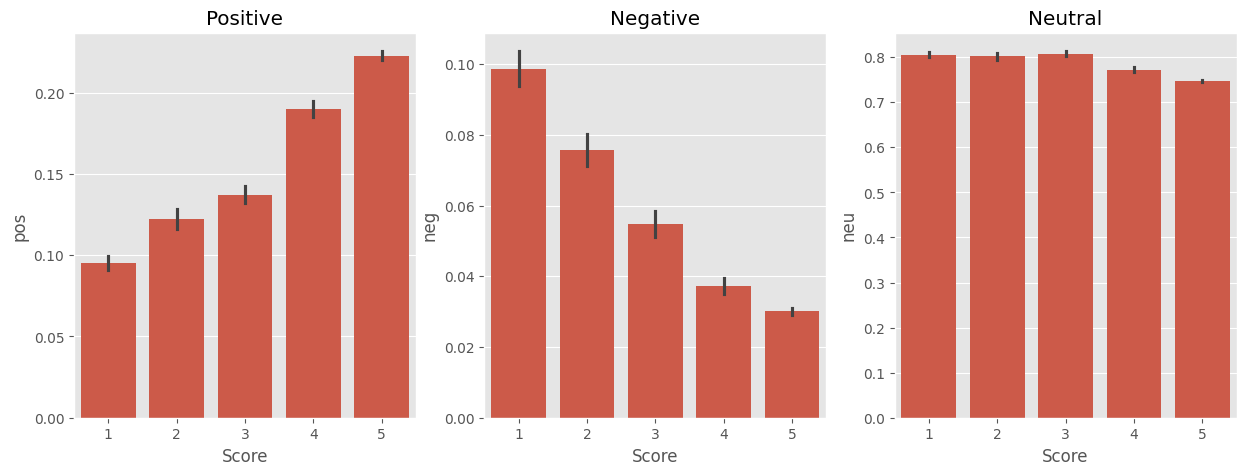

In [101]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.barplot(data=vader, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vader, x='Score', y='neg', ax=axs[1])
sns.barplot(data=vader, x='Score', y='neu', ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Negative")
axs[2].set_title("Neutral")
plt.show()

Looks like VADER sentiment intensity analyser is able to decently provide proper sentiment values for texts in reviews as they are nicely aligned with the star rating. Lower ratings have higher negative sentiment value and vice versa.